# Import all the modules

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# Split Directory

In [3]:
def split_directory(ratio=0.2):
    # get the directory of data files
    data_dir = os.path.join(os.getcwd(), 'data')
    # get the train directory and split to 20% test and 80% train
    train_dir = os.path.join(data_dir, 'train')
    test_dir = os.path.join(data_dir, 'test')

    # get the train and move to test directory 20% of the data
    train_images = os.listdir(train_dir)
    test_images = train_images[:int(len(train_images)*ratio)]
    for image in test_images:
        os.rename(os.path.join(train_dir, image), os.path.join(test_dir, image))


# Visualize Data

In [4]:
import cv2 
import PIL 

In [5]:
# get train dir and test dir
data_dir = os.path.join(os.getcwd(), 'data')
raw_dir  = os.path.join(data_dir, 'raw')
train_dir = os.path.join(raw_dir, 'train')
test_dir = os.path.join(raw_dir, 'test')


# get the train and test images
train_images = os.listdir(train_dir)
test_images = os.listdir(test_dir)

# visualize the images
def visualize_images(images, labels, rows=3, cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
    axes = axes.flatten()
    for img, ax, label in zip(images, axes, labels):
        ax.imshow(img)
        ax.set_title(label)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

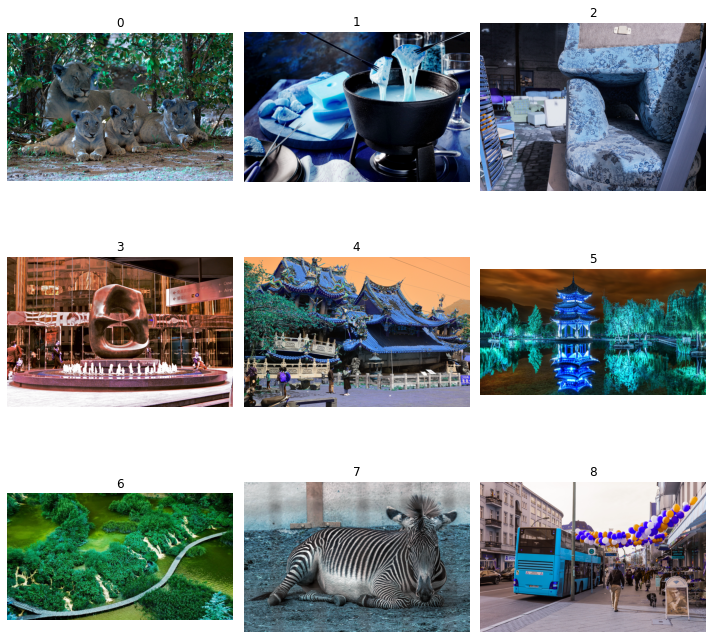

In [6]:
visualize_images([cv2.imread(os.path.join(train_dir, image)) for image in train_images[:9]], [i for i in range(9)])

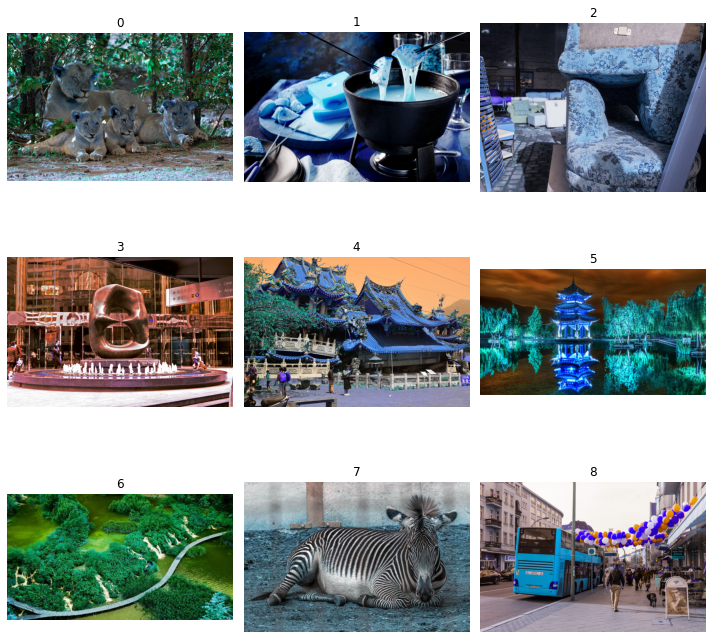

In [7]:
# resize the images from train and test dirs
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

# resize the images train dir
images = []
for image in train_images:
    image_path = os.path.join(train_dir, image)
    image = cv2.imread(image_path)
    image = image_resize(image, width=1084)
    images.append(image)
visualize_images(images, [i for i in range(9)])

In [8]:
# check if the width is 1084
for image in images:
    assert image.shape[1] == 1084

In [9]:
import heapq

def find_smallest_height(images):
    height = 100000
    for image in images:
        if image.shape[0] < height:
            height = image.shape[0]
    return height

def find_n_smallest_height(images, n=10):
    height = []
    for image in images:
        heapq.heappush(height, image.shape[0])
    return heapq.nsmallest(n, height)[-1]

print(find_smallest_height(images))
for i in range(1, 100 + 1):
    print(find_n_smallest_height(images, i))

344
344
388
395
408
414
433
452
459
464
471
471
497
503
510
510
510
511
516
542
542
542
542
551
554
554
554
561
564
567
567
567
570
573
573
578
580
580
580
580
581
583
583
586
593
593
594
599
599
599
599
599
599
599
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605
605


In [10]:
# remove the images that are smaller than 500 height
def remove_images(images, height):
    for image in images:
        if image.shape[0] < height:
            images.remove(image)
    return images

images = remove_images(images, 500)
print(find_smallest_height(images))
print(len(images))

503
4268


C:\Users\Suren\AppData\Local\Temp\ipykernel_10480\28100874.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  images.remove(image)


In [11]:
# crop the images to 503 height and 1084 width
def crop_images(images, height, width):
    cropped_images = []
    for image in images:
        cropped_images.append(image[:height, :width])
    return cropped_images

images = crop_images(images, 503, 1084)

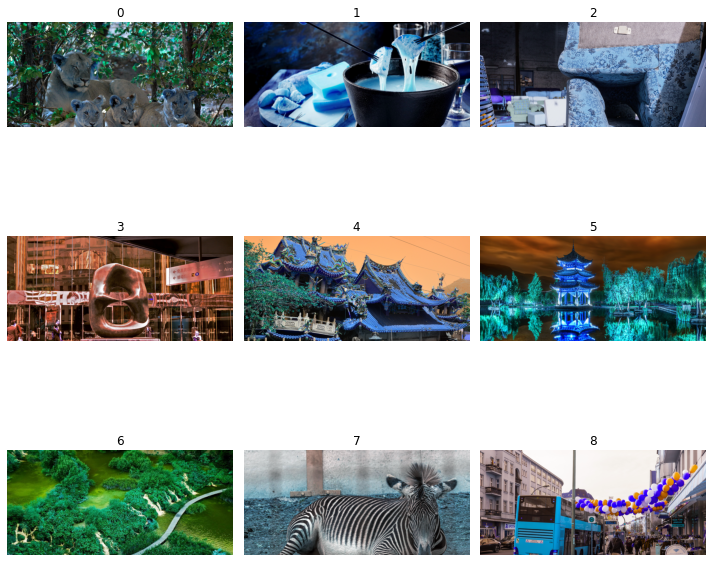

In [12]:
visualize_images(images, [i for i in range(9)])

In [13]:
# save the images into a new directory
def save_images(images, directory):
    for i in range(len(images)):
        cv2.imwrite(os.path.join(directory, f'image_{i}.jpg'), images[i])


# Save The Original Data

In [15]:
# save images into train dirs in directory named original
original_dir = os.path.join(data_dir, 'original')
train_original_dir = os.path.join(original_dir, 'train')

# save_images(images, train_original_dir)

# Preprocessing

In [17]:
downsampling_methods  = ["max_pooling", "average_pooling", "bicubic", "nearest_neighbor"]

def downsample_images(images, method="max_pooling"):
    downsampled_images = []
    for image in images:
        if method == "max_pooling":
            downsampled_images.append(tf.nn.max_pool2d(image, ksize=2, strides=2, padding='VALID'))
        elif method == "average_pooling":
            downsampled_images.append(tf.nn.avg_pool2d(image, ksize=2, strides=2, padding='VALID'))
        elif method == "bicubic":
            downsampled_images.append(tf.image.resize(image, size=(image.shape[0]//2, image.shape[1]//2), method='bicubic'))
        elif method == "nearest_neighbor":
            downsampled_images.append(tf.image.resize(image, size=(image.shape[0]//2, image.shape[1]//2), method='nearest'))
    return downsampled_images

def downsample_image(image, method="max_pooling"):
    if method == "max_pooling":
        return tf.nn.max_pool2d(image, ksize=2, strides=2, padding='VALID')
    elif method == "average_pooling":
        return tf.nn.avg_pool2d(image, ksize=2, strides=2, padding='VALID')
    elif method == "bicubic":
        return tf.image.resize(image, size=(image.shape[0]//2, image.shape[1]//2), method='bicubic')
    elif method == "nearest_neighbor":
        return tf.image.resize(image, size=(image.shape[0]//2, image.shape[1]//2), method='nearest')


# downsampled_images = [downsample_images(images, method=method) for method in downsampling_methods]
# visualize_images(downsampled_images[0], [i for i in range(9)])
# visualize_images([downsample_image(images[0])], ["max_pooling"])
print(images[0].shape, images[0].ndim, images[0].dtype)
# intialize the tensors
# tensor_images = tf.convert_to_tensor(images)
# visualize_images(downsample_image(tensor_images[0]), ['max_pooling'])
tensor_image = tf.convert_to_tensor(images[0])
visualize_images([downsample_image(tensor_image)], ['max_pooling'])

(503, 1084, 3) 3 uint8
ERROR! Session/line number was not unique in database. History logging moved to new session 117


InvalidArgumentError: {{function_node __wrapped__MaxPool_device_/job:localhost/replica:0/task:0/device:CPU:0}} tensor_in_shape must have 2 spatial dimensions. 3 0 [Op:MaxPool]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


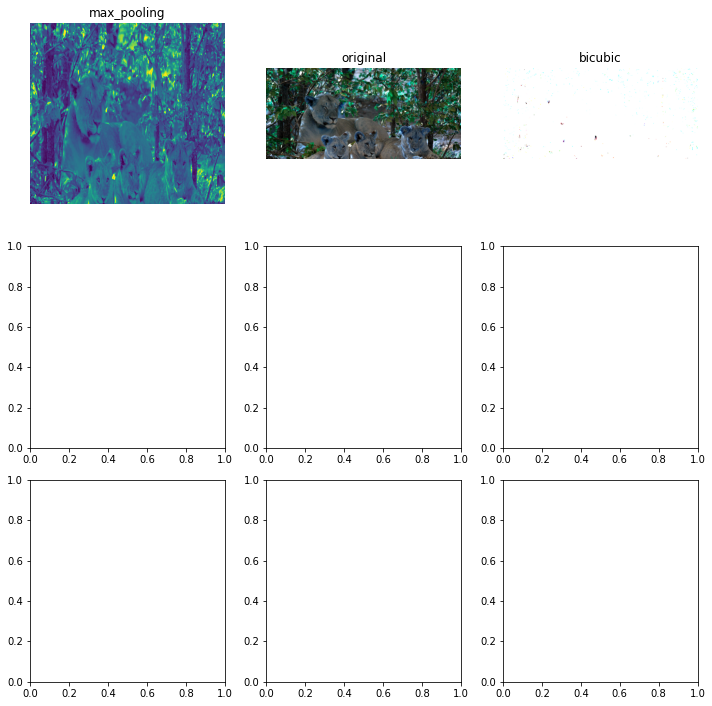

: 

In [38]:
visualize_images([downsample_image(tf.expand_dims(tensor_image, axis=-1), method='max_pooling')[:,:,:,0], 
tensor_image,
downsample_image(tensor_image, method="bicubic")], ['max_pooling', 'original', 'bicubic'])